# **Experiment 3**
## **Aim - To perform Object Classification using SVM and KNN**
## **Platform - Python3, Google Colab, Ubuntu v18**
## **Rebecca Dsouza - 2016130019**

## **HTML View - https://nbviewer.jupyter.org/github/beckssss/Robotic-Vision-Object-Classification/blob/a2424a50bc72939c2ac5ea011132ff5dd9e61520/Experiment_3.ipynb**

#**Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from google.colab import files
from google.colab.patches import cv2_imshow


import pandas as pd
import numpy
import cv2
import os
import glob

#**File Upload**

In [20]:
from google.colab import files
uploaded = files.upload()

Saving case1.jpg to case1.jpg
Saving case2.jpg to case2.jpg


# **File Load from Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Prepare data for training and testing**

In [ ]:
!unzip /content/drive/MyDrive/Datasets/waste-classification.zip

In [4]:
from glob import glob
O_1 = glob("/content/DATASET/train/O/*.jpg")
R_1 = glob('/content/DATASET/train/R/*.jpg')

In [6]:
O_1 = O_1[:800]
R_1 = R_1[:800]
print(len(O_1),len(R_1))

800 800


In [7]:
!mkdir Data
files = ' '.join(O_1)
!mv -t "/content/Data" $files
files = ' '.join(R_1)
!mv -t "/content/Data" $files

In [26]:
import os
import glob
import numpy
import cv2

imagePaths = []
# input images
for img in glob.glob("Data/*.jpg"):  # folder train1 contains multiple dog and cat images in .jpg
    imagePaths = list(glob.glob("Data/*.jpg"))

# Extract the image into vector
def image_vector(image, size=(128, 128)):
    return cv2.resize(image, size).flatten()


# initialize the pixel intensities matrix, labels list
imagematrix = []
imagelabels = []
pixels = None
# Build image vector matrix
for (i, path) in enumerate(imagePaths):
    # load the image and extract the class label, image intensities
    image = cv2.imread(path)
    if path.split(os.path.sep)[-1].split("_")[0] == 'O':
      label=0
    else:
      label=1
    #label = path.split(os.path.sep)[-1].split(".")[0]
    pixels = image_vector(image)

    # update the images and labels matricies respectively
    imagematrix.append(pixels)
    imagelabels.append(label)

imagematrix = numpy.array(imagematrix)
imagelabels = numpy.array(imagelabels)

In [27]:
(train_img, test_img, train_label, test_label) = train_test_split(imagematrix, imagelabels, test_size=0.25, random_state=50)

# **SVM Model in Sklearn**

In [28]:
model1 = SVC(max_iter=-1, kernel='rbf', class_weight='balanced',gamma='scale')  # kernel linear is better Gausian kernel here
model1.fit(train_img, train_label)
acc1 = model1.score(test_img, test_label)
print("SVM model accuracy: {:.2f}%".format(acc1 * 100))

SVM model accuracy: 79.25%


# **KNN Model in Sklearn**

In [29]:
model2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model2.fit(train_img, train_label)
acc2 = model2.score(test_img, test_label)
print("KNN model accuracy: {:.2f}%".format(acc2 * 100))

KNN model accuracy: 70.25%


# **Prediction Sample**

Test Case 1
Prediction by SVM - 0
Prediction by KNN - 0


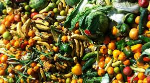

Test Case 2
Prediction by SVM - 0
Prediction by KNN - 0


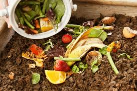

Test Case 3
Prediction by SVM - 1
Prediction by KNN - 1


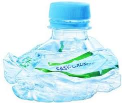

Test Case 4
Prediction by SVM - 1
Prediction by KNN - 1


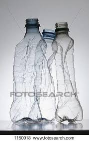

Test Case 5
Prediction by SVM - 1
Prediction by KNN - 1


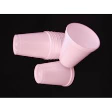

In [30]:
# Extract the image into vector
def image_vector(image, size=(128, 128)):
    return cv2.resize(image, size).flatten()
    

for t in range(1,6):
  img = cv2.imread("case{0}.jpg".format(t))
  pixel = image_vector(img)
  rawImage = numpy.array([pixel])
  prediction1 = model1.predict(rawImage)
  prediction2 = model2.predict(rawImage)
  print("Test Case {0}".format(t))
  print("Prediction by SVM - {0}".format(prediction1[0]))
  print("Prediction by KNN - {0}".format(prediction1[0]))
  w, h = len(img[0]), len(img)
  if w>1000:
    w, h = w//4, h//4
  else:
    w, h = w//2, h//2
  cv2_imshow(cv2.resize(img,(w,h)))